# Automatic Concept Mapping using fuzzy, medcat-fuzzy, and medcat

## Define Base Directory

In [2]:
baseDir = '/superbugai-data/yash/temp'

## Read SNOMED vocabulary

In [58]:
import pandas as pd

snomedDf = pd.read_csv(baseDir + '/' + 'preprocessed_snomed.csv')
snomedDf = snomedDf[snomedDf.name_status == 'P']
snomedDf

,cui,name,name_status,ontologies,description_type_ids,type_ids
0,10000006,Radiating chest pain (finding),P,SNOMED-CT,finding,67667581
1,1000001000168107,"Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet, ...",P,SNOMED-CT,containered trade product pack,19443049
2,100001000032107,Mass of left side of middle abdomen (finding),P,SNOMED-CT,finding,67667581
3,1000011000168105,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,NaN,72706784
4,1000021000168103,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,trade product pack,44751718
...,...,...,...,...,...,...
507707,999951000168105,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,trade product pack,44751718
507708,999961000168107,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,containered trade product pack,19443049
507709,999971000168101,Pantoprazole Heartburn Relief (Apohealth) (tra...,P,SNOMED-CT,trade product,99637394
507710,999981000168103,Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet (...,P,SNOMED-CT,NaN,72706784


## Read concepts from file

In [3]:
import pandas as pd

conceptsDf = pd.read_csv(baseDir + '/' + 'concept_names.txt', sep='\t')
conceptsDf

,concept_name,concept_code,source_concept_id,source_vocabulary_id,source_domain_id,source_concept_class_id,target_concept_id,relationship_id,reverese_relationship_id,concept_name_con,domain_id,vocab_id,concept_class_id,standard
0,Emergency Department,Emergency Department,2000001901,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
1,Medicine,Medicine,2000001902,mimiciv_cs_place_of_service,Visit,Visit,38004515,Maps to,Mapped from,Hospital,Visit,Medicare Specialty,Visit,S
2,Emergency Department Observation,Emergency Department Observation,2000001903,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
3,Nursery - Well Babies,Nursery - Well Babies,2000001904,mimiciv_cs_place_of_service,Visit,Visit,4160140,Maps to,Mapped from,Newborn nursery unit,Observation,SNOMED,Location,S
4,Medicine/Cardiology,Medicine/Cardiology,2000001905,mimiciv_cs_place_of_service,Visit,Visit,581383,Maps to,Mapped from,Inpatient Cardiac Care Facility,Visit,CMS Place of Service,Visit,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,NMED,NMED,2000001864,mimiciv_vis_service,Visit,Visit,4150070,Maps to,Mapped from,Neurology department,Observation,SNOMED,Location,S
3838,VSURG,VSURG,2000001865,mimiciv_vis_service,Visit,Visit,4150086,Maps to,Mapped from,Vascular surgery department,Observation,SNOMED,Location,S
3839,PSURG,PSURG,2000001866,mimiciv_vis_service,Visit,Visit,4150085,Maps to,Mapped from,Plastic surgery department,Observation,SNOMED,Location,S
3840,TSURG,TSURG,2000001867,mimiciv_vis_service,Observation,Location,4148989,Maps to,Mapped from,Thoracic surgery department,Observation,SNOMED,Location,S


## Create mapping

### Define a function for fuzzy mapping

In [4]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


def performFuzzyMapping(conceptId, conceptName):
    matchingConcept = process.extract(conceptName,  snomedDf.name, limit=1, scorer=fuzz.token_sort_ratio)
    return (conceptId, conceptName, matchingConcept[0][0])

/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Define a function for MedCat mapping

In [5]:
from medcat.vocab import Vocab
from medcat.cdb import CDB
from medcat.cat import CAT
from medcat.meta_cat import MetaCAT


# Load the vocab model you downloaded
vocab = Vocab.load(baseDir + '/' + 'trained_vocs/shared/vocab.dat')
# Load the cdb model you downloaded
cdb = CDB.load(baseDir + '/' + 'cdb-medmen-v1_2.dat')
# Download the mc_status model from the models section below and unzip it
mc_status = MetaCAT.load(baseDir + '/' + "trained_vocs/shared/mc_status")
cat = CAT(cdb=cdb, config=cdb.config, vocab=vocab, meta_cats=[mc_status])

/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/medcat/cat.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [6]:
def performMedcatMapping(conceptId, conceptName):
    entities = cat.get_entities(conceptName)['entities']
    conceptPrettyName = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = float(entity['context_similarity'])
        if contextSimilarityScore > maxContextSimilarityScore:
            conceptPrettyName = entity['pretty_name']
            maxContextSimilarityScore = contextSimilarityScore
    return (conceptId, conceptName, conceptPrettyName)

### Perform mapping for all concept names

In [10]:
from tqdm import tqdm


print('Performing MedCat Mapping')

mappingOutputMedcat = []
for i, row in tqdm(conceptsDf.iterrows()):
    conceptId, conceptName, matchingConcept = performMedcatMapping(row.source_concept_id, row.concept_name)
    mappingOutputMedcat.append((conceptId, conceptName, matchingConcept))

from multiprocessing import Pool

print('Performing Fuzzy Mapping')

with Pool(15) as p:
    mappingOutputFuzzy = p.starmap(performFuzzyMapping, zip(conceptsDf.source_concept_id, conceptsDf.concept_name))

Performing MedCat Mapping


2it [00:00,  3.77it/s]

Performing Fuzzy Mapping


In [11]:
mappingOutputFuzzyDf = pd.DataFrame(mappingOutputFuzzy, columns=['concept_id', 'concept_name', 'conept_mapped_fuzzy'])
mappingOutputFuzzyDf

,concept_id,concept_name,conept_mapped_fuzzy
0,2000001901,Emergency Department,Genetics department (environment)
1,2000001902,Medicine,Merodicein (substance)


In [16]:
mappingOutputMedcatDf = pd.DataFrame(mappingOutputMedcat, columns=['concept_id', 'concept_name', 'conept_mapped_medcat'])
mappingOutputMedcatDf

,concept_id,concept_name,conept_mapped_medcat
0,2000001901,Emergency Department,Accident and Emergency department
1,2000001902,Medicine,Medicine
2,2000001903,Emergency Department Observation,Accident and Emergency department


In [22]:
mergedDf = pd.merge(mappingOutputFuzzyDf, mappingOutputMedcatDf, on='concept_id')
mergedDf.drop('concept_name_y', axis=1, inplace=True)
mergedDf.rename(columns={'concept_name_x': 'concept_name'}, inplace=True)
mergedDf

,concept_id,concept_name,conept_mapped_fuzzy,conept_mapped_medcat
0,2000001901,Emergency Department,Genetics department (environment),Accident and Emergency department
1,2000001902,Medicine,Merodicein (substance),Medicine


In [24]:
mergedDf.to_csv(baseDir + '/' + 'mapped_concepts.csv', index=False)

In [3]:
import pandas as pd

mappedConceptsDf = pd.read_csv(baseDir + '/' + 'mapped_concepts.csv')
mappedConceptsDf

,concept_id,concept_name,conept_mapped_fuzzy,conept_mapped_medcat
0,2000001901,Emergency Department,Genetics department (environment),Accident and Emergency department
1,2000001902,Medicine,Merodicein (substance),Medicine


# Section 2: Analysing output files

In [7]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Read the files

In [8]:
import pandas as pd

baseDir = '/superbugai-data/yash/temp'

conceptsDf = pd.read_csv(baseDir + '/' + 'concept_names.txt', sep='\t')
mappedConceptsCdbDf = pd.read_csv(baseDir + '/' + 'mapped_concept_names_cdb.csv')
mappedConceptsFuzzyDf = pd.read_csv(baseDir + '/' + 'mapped_concept_names_fuzzy.csv')
mappedConceptsMedcatDf = pd.read_csv(baseDir + '/' + 'mapped_concept_names_medcat.csv')

## Read SNOMED vocabulary file

In [9]:
import pandas as pd

snomedDf = pd.read_csv(baseDir + '/' + 'preprocessed_snomed.csv')
snomedDf = snomedDf[snomedDf.name_status == 'P']
snomedDf

,cui,name,name_status,ontologies,description_type_ids,type_ids
0,10000006,Radiating chest pain (finding),P,SNOMED-CT,finding,67667581
1,1000001000168107,"Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet, 30 tablets, bottle (containered trade product pack)",P,SNOMED-CT,containered trade product pack,19443049
2,100001000032107,Mass of left side of middle abdomen (finding),P,SNOMED-CT,finding,67667581
3,1000011000168105,Pantoprazole Heartburn Relief (Apohealth) (pantoprazole 20 mg) enteric tablet (trade product unit of use),P,SNOMED-CT,NaN,72706784
4,1000021000168103,"Pantoprazole Heartburn Relief (Apohealth) (pantoprazole 20 mg) enteric tablet, 7 tablets (trade product pack)",P,SNOMED-CT,trade product pack,44751718
...,...,...,...,...,...,...
507707,999951000168105,"Moxifloxacin (Apo) (moxifloxacin 400 mg) tablet, 5 tablets (trade product pack)",P,SNOMED-CT,trade product pack,44751718
507708,999961000168107,"Moxifloxacin (Apo) (moxifloxacin 400 mg) tablet, 5 tablets, blister pack (containered trade product pack)",P,SNOMED-CT,containered trade product pack,19443049
507709,999971000168101,Pantoprazole Heartburn Relief (Apohealth) (trade product),P,SNOMED-CT,trade product,99637394
507710,999981000168103,Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet (trade product unit of use),P,SNOMED-CT,NaN,72706784


In [10]:
snomedDf['cui'] = snomedDf.cui.astype(str)

## Concepts Dataframe

In [11]:
conceptsDf

,concept_name,concept_code,source_concept_id,source_vocabulary_id,source_domain_id,source_concept_class_id,target_concept_id,relationship_id,reverese_relationship_id,concept_name_con,domain_id,vocab_id,concept_class_id,standard
0,Emergency Department,Emergency Department,2000001901,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
1,Medicine,Medicine,2000001902,mimiciv_cs_place_of_service,Visit,Visit,38004515,Maps to,Mapped from,Hospital,Visit,Medicare Specialty,Visit,S
2,Emergency Department Observation,Emergency Department Observation,2000001903,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
3,Nursery - Well Babies,Nursery - Well Babies,2000001904,mimiciv_cs_place_of_service,Visit,Visit,4160140,Maps to,Mapped from,Newborn nursery unit,Observation,SNOMED,Location,S
4,Medicine/Cardiology,Medicine/Cardiology,2000001905,mimiciv_cs_place_of_service,Visit,Visit,581383,Maps to,Mapped from,Inpatient Cardiac Care Facility,Visit,CMS Place of Service,Visit,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,NMED,NMED,2000001864,mimiciv_vis_service,Visit,Visit,4150070,Maps to,Mapped from,Neurology department,Observation,SNOMED,Location,S
3838,VSURG,VSURG,2000001865,mimiciv_vis_service,Visit,Visit,4150086,Maps to,Mapped from,Vascular surgery department,Observation,SNOMED,Location,S
3839,PSURG,PSURG,2000001866,mimiciv_vis_service,Visit,Visit,4150085,Maps to,Mapped from,Plastic surgery department,Observation,SNOMED,Location,S
3840,TSURG,TSURG,2000001867,mimiciv_vis_service,Observation,Location,4148989,Maps to,Mapped from,Thoracic surgery department,Observation,SNOMED,Location,S


## CDB mapping file

In [12]:
mappedConceptsCdbDf

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts
0,Emergency Department,"['emergency', 'department']","[['25876001'], []]","[['Emergency'], []]"
1,Medicine,['medicine'],[[]],[[]]
2,Emergency Department Observation,"['emergency', 'department', 'observation']","[['25876001'], [], []]","[['Emergency'], [], []]"
3,Nursery - Well Babies,"['nursery', 'well', 'babies']","[['161117005'], ['3442003', '20572008'], []]","[['Nursery'], ['Better', 'Good (qualifier value)'], []]"
4,Medicine/Cardiology,"['medicine', 'cardiology']","[[], ['394579002']]","[[], ['Cardiology']]"
...,...,...,...,...
3837,NMED,['nmed'],[[]],[[]]
3838,VSURG,['vsurg'],[[]],[[]]
3839,PSURG,['psurg'],[[]],[[]]
3840,TSURG,['tsurg'],[[]],[[]]


In [13]:
import ast
import itertools
from fuzzywuzzy import fuzz
from tqdm import tqdm

matchingConcepts = []
matchingScores = []
matchingCuis = []
for _, row in tqdm(mappedConceptsCdbDf.iterrows()):
    mappedConcepts = itertools.chain(*ast.literal_eval(row["Mapped Concepts"]))
    mappedCuis = itertools.chain(*ast.literal_eval(row["Mapped CUIs"]))
    maxScore = 0
    matchingConcept = None
    matchingCui = None
    for mappedConcept, mappedCui in zip(mappedConcepts, mappedCuis):
        matchingScore = fuzz.token_sort_ratio(mappedConcept, row["Concept Name"])
        if matchingScore > maxScore:
            maxScore = matchingScore
            matchingConcept = mappedConcept
            matchingCui = mappedCui
    matchingConcepts.append(matchingConcept)
    matchingScores.append(maxScore)
    matchingCuis.append(matchingCui)
mappedConceptsCdbDf["Mapped Concept CDB"] = matchingConcepts
mappedConceptsCdbDf["Mapped Score CDB"] = matchingScores
mappedConceptsCdbDf["Mapped ID CDB"] = matchingCuis
mappedConceptsCdbDf

/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
3842it [00:01, 2012.46it/s]


,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Mapped Concept CDB,Mapped Score CDB,Mapped ID CDB
0,Emergency Department,"['emergency', 'department']","[['25876001'], []]","[['Emergency'], []]",Emergency,62,25876001
1,Medicine,['medicine'],[[]],[[]],None,0,None
2,Emergency Department Observation,"['emergency', 'department', 'observation']","[['25876001'], [], []]","[['Emergency'], [], []]",Emergency,44,25876001
3,Nursery - Well Babies,"['nursery', 'well', 'babies']","[['161117005'], ['3442003', '20572008'], []]","[['Nursery'], ['Better', 'Good (qualifier value)'], []]",Nursery,54,161117005
4,Medicine/Cardiology,"['medicine', 'cardiology']","[[], ['394579002']]","[[], ['Cardiology']]",Cardiology,69,394579002
...,...,...,...,...,...,...,...
3837,NMED,['nmed'],[[]],[[]],None,0,None
3838,VSURG,['vsurg'],[[]],[[]],None,0,None
3839,PSURG,['psurg'],[[]],[[]],None,0,None
3840,TSURG,['tsurg'],[[]],[[]],None,0,None


In [14]:
mappedConceptsCdbDf = mappedConceptsCdbDf[mappedConceptsFuzzyDf['Concept Name'].notna()]
mappedConceptsCdbDf

/tmp/ipykernel_2500207/3966664569.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mappedConceptsCdbDf = mappedConceptsCdbDf[mappedConceptsFuzzyDf['Concept Name'].notna()]


,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Mapped Concept CDB,Mapped Score CDB,Mapped ID CDB
0,Emergency Department,"['emergency', 'department']","[['25876001'], []]","[['Emergency'], []]",Emergency,62,25876001
1,Medicine,['medicine'],[[]],[[]],None,0,None
2,Emergency Department Observation,"['emergency', 'department', 'observation']","[['25876001'], [], []]","[['Emergency'], [], []]",Emergency,44,25876001
3,Nursery - Well Babies,"['nursery', 'well', 'babies']","[['161117005'], ['3442003', '20572008'], []]","[['Nursery'], ['Better', 'Good (qualifier value)'], []]",Nursery,54,161117005
4,Medicine/Cardiology,"['medicine', 'cardiology']","[[], ['394579002']]","[[], ['Cardiology']]",Cardiology,69,394579002
...,...,...,...,...,...,...,...
3837,NMED,['nmed'],[[]],[[]],None,0,None
3838,VSURG,['vsurg'],[[]],[[]],None,0,None
3839,PSURG,['psurg'],[[]],[[]],None,0,None
3840,TSURG,['tsurg'],[[]],[[]],None,0,None


In [15]:
mappedConceptsCdbDf = pd.merge(mappedConceptsCdbDf, snomedDf.add_suffix(' CDB'), how='left', left_on='Mapped ID CDB', right_on='cui CDB')
mappedConceptsCdbDf

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Mapped Concept CDB,Mapped Score CDB,Mapped ID CDB,cui CDB,name CDB,name_status CDB,ontologies CDB,description_type_ids CDB,type_ids CDB
0,Emergency Department,"['emergency', 'department']","[['25876001'], []]","[['Emergency'], []]",Emergency,62,25876001,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
1,Medicine,['medicine'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN
2,Emergency Department Observation,"['emergency', 'department', 'observation']","[['25876001'], [], []]","[['Emergency'], [], []]",Emergency,44,25876001,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
3,Nursery - Well Babies,"['nursery', 'well', 'babies']","[['161117005'], ['3442003', '20572008'], []]","[['Nursery'], ['Better', 'Good (qualifier value)'], []]",Nursery,54,161117005,161117005,Nursery (finding),P,SNOMED-CT,finding,67667581.0
4,Medicine/Cardiology,"['medicine', 'cardiology']","[[], ['394579002']]","[[], ['Cardiology']]",Cardiology,69,394579002,394579002,Cardiology (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,NMED,['nmed'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN
3838,VSURG,['vsurg'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN
3839,PSURG,['psurg'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN
3840,TSURG,['tsurg'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
mappedConceptsCdbDf.sort_values('Mapped Score CDB', ascending=True).head(5)

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Mapped Concept CDB,Mapped Score CDB,Mapped ID CDB,cui CDB,name CDB,name_status CDB,ontologies CDB,description_type_ids CDB,type_ids CDB
3841,NBB,['nbb'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN
1449,UVC,['uvc'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN
1448,OD,['od'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN
1446,DLUVC,['dluvc'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN
1445,PICC,['picc'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
mappedConceptsCdbDf[mappedConceptsCdbDf['Mapped Concept CDB'].notna()].sort_values('Mapped Score CDB', ascending=True).head(10)

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Mapped Concept CDB,Mapped Score CDB,Mapped ID CDB,cui CDB,name CDB,name_status CDB,ontologies CDB,description_type_ids CDB,type_ids CDB
2689,CONCUSSION W/O CC/MCC,"['concussion', 'w', 'o', 'cc', 'mcc']","[[], [], [], ['258773002'], []]","[[], [], [], ['Milliliter'], []]",Milliliter,6,258773002,258773002,Milliliter (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
1414,IM,['im'],[['41775005']],[['At risk for impaired home maintenance management']],At risk for impaired home maintenance management,8,41775005,41775005,At risk for impaired home maintenance management (finding),P,SNOMED-CT,finding,67667581.0
2687,CONCUSSION W CC,"['concussion', 'w', 'cc']","[[], [], ['258773002']]","[[], [], ['Milliliter']]",Milliliter,8,258773002,258773002,Milliliter (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
534,#/lpf,['lpf'],[['415059001']],[['Per low power field']],Per low power field,9,415059001,415059001,Per low power field (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
1483,IC,['ic'],"[['1131441000168106', '1222731006']]","[['index of concentration unit', 'American Joint Committee on Cancer stage IC']]",American Joint Committee on Cancer stage IC,9,1222731006,1222731006,American Joint Committee on Cancer stage IC (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
2217,#/hpf,['hpf'],[['259034003']],[['per high power field']],per high power field,9,259034003,259034003,per high power field (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
2449,THROAT,['throat'],[['49928004']],[['Structure of anterior portion of neck']],Structure of anterior portion of neck,9,49928004,49928004,Structure of anterior portion of neck (body structure),P,SNOMED-CT,body structure,37552161.0
1880,/hpf,['hpf'],[['259034003']],[['per high power field']],per high power field,9,259034003,259034003,per high power field (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
3708,OR Received,"['or', 'received']","[['420561004'], []]","[['Or - dosing instruction fragment'], []]",Or - dosing instruction fragment,10,420561004,420561004,Or - dosing instruction fragment (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
1454,AD,['ad'],[['52870002']],[['Admitting diagnosis (contextual qualifier)']],Admitting diagnosis (contextual qualifier),10,52870002,52870002,Admitting diagnosis (contextual qualifier) (qualifier value),P,SNOMED-CT,qualifier value,7882689.0


In [18]:
mappedConceptsCdbDf.sort_values('Mapped Score CDB', ascending=False).head(5)

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Mapped Concept CDB,Mapped Score CDB,Mapped ID CDB,cui CDB,name CDB,name_status CDB,ontologies CDB,description_type_ids CDB,type_ids CDB
505,Norepinephrine,['norepinephrine'],"[['31637011000036100', '37760011000036102', '45555007']]","[['norepinephrine', 'norepinephrine', 'Norepinephrine']]",norepinephrine,100,31637011000036100,31637011000036100,norepinephrine (AU substance),P,SNOMED-CT,AU substance,1289271.0
606,imatinib,['imatinib'],"[['21401011000036104', '2217011000036109', '414460008']]","[['imatinib', 'imatinib', 'Imatinib']]",imatinib,100,21401011000036104,21401011000036104,imatinib (medicinal product),P,SNOMED-CT,medicinal product,37785117.0
572,Norepinephrine,['norepinephrine'],"[['31637011000036100', '37760011000036102', '45555007']]","[['norepinephrine', 'norepinephrine', 'Norepinephrine']]",norepinephrine,100,31637011000036100,31637011000036100,norepinephrine (AU substance),P,SNOMED-CT,AU substance,1289271.0
578,Hydromorphone,['hydromorphone'],"[['21480011000036107', '2198011000036107', '44508008']]","[['hydromorphone', 'hydromorphone', 'Hydromorphone']]",hydromorphone,100,21480011000036107,21480011000036107,hydromorphone (medicinal product),P,SNOMED-CT,medicinal product,37785117.0
584,fluticasone,['fluticasone'],"[['2134011000036106', '397192001']]","[['fluticasone', 'Fluticasone']]",fluticasone,100,2134011000036106,2134011000036106,fluticasone (AU substance),P,SNOMED-CT,AU substance,1289271.0


In [19]:
mappedConceptsCdbDf[(mappedConceptsCdbDf['Mapped Concept CDB'].apply(lambda x: x.lower() if x else None) != mappedConceptsCdbDf['Concept Name'].apply(lambda x: x.lower() if x else None))]\
    .sort_values('Mapped Score CDB', ascending=False)\
        .head(10)

,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Mapped Concept CDB,Mapped Score CDB,Mapped ID CDB,cui CDB,name CDB,name_status CDB,ontologies CDB,description_type_ids CDB,type_ids CDB
1501,Haemodialysis,['haemodialysis'],[['302497006']],[['Hemodialysis']],Hemodialysis,96,302497006,302497006,Hemodialysis (procedure),P,SNOMED-CT,procedure,28321150.0
1948,ACTINOMYCETE,['actinomycete'],[['314421007']],[['Actinomycetes']],Actinomycetes,96,314421007,314421007,Actinomycetes (organism),P,SNOMED-CT,organism,81102976.0
2055,CANCELLED,['cancelled'],[['89925002']],[['Canceled']],Canceled,94,89925002,89925002,Canceled (qualifier value),P,SNOMED-CT,qualifier value,7882689.0
3772,Neonatal Intensive Care Unit (NICU),"['neonatal', 'intensive', 'care', 'unit', 'nicu']","[['255407002'], [], [], ['246514001', '37011000036108', '767525000'], ['405269005']]","[['Neonatal'], [], [], ['Units', 'unit (AU qualifier)', 'Unit (qualifier value)'], ['Neonatal intensive care unit']]",Neonatal intensive care unit,92,405269005,405269005,Neonatal intensive care unit (environment),P,SNOMED-CT,environment,75168589.0
3453,PENICILLIN G,"['penicillin', 'g']","[['764146007'], []]","[['Penicillin'], []]",Penicillin,91,764146007,764146007,Penicillin (substance),P,SNOMED-CT,substance,91187746.0
1209,mesalamine,['mesalamine'],[['387501005']],[['Mesalazine']],Mesalazine,90,387501005,387501005,Mesalazine (substance),P,SNOMED-CT,substance,91187746.0
818,mesalamine,['mesalamine'],[['387501005']],[['Mesalazine']],Mesalazine,90,387501005,387501005,Mesalazine (substance),P,SNOMED-CT,substance,91187746.0
1140,mesalamine,['mesalamine'],[['387501005']],[['Mesalazine']],Mesalazine,90,387501005,387501005,Mesalazine (substance),P,SNOMED-CT,substance,91187746.0
68,mesalamine,['mesalamine'],[['387501005']],[['Mesalazine']],Mesalazine,90,387501005,387501005,Mesalazine (substance),P,SNOMED-CT,substance,91187746.0
324,mesalamine,['mesalamine'],[['387501005']],[['Mesalazine']],Mesalazine,90,387501005,387501005,Mesalazine (substance),P,SNOMED-CT,substance,91187746.0


## Fuzzy mapping file

In [20]:
mappedConceptsFuzzyDf

,Concept Name,Matching Concept
0,Emergency Department,"[('Genetics department (environment)', 71, 230127)]"
1,Medicine,"[('Merodicein (substance)', 57, 197790)]"
2,Emergency Department Observation,"[('Emergency department physician (occupation)', 74, 229560)]"
3,Nursery - Well Babies,"[('Well nourished (finding)', 59, 172636)]"
4,Medicine/Cardiology,"[('Cardiology service (procedure)', 68, 230258)]"
...,...,...
3838,VSURG,"[('Causus (organism)', 40, 326208)]"
3839,PSURG,"[('Surgeon (occupation)', 43, 224480)]"
3840,TSURG,"[('Surgeon (occupation)', 43, 224480)]"
3841,NBB,"[('Maneb (substance)', 33, 348121)]"


In [21]:
import ast

mappedConceptsFuzzyDf["Mapped Concept Fuzzy"] = mappedConceptsFuzzyDf["Matching Concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][0])
mappedConceptsFuzzyDf["Mapped ID Fuzzy"] = mappedConceptsFuzzyDf["Matching Concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][2])
mappedConceptsFuzzyDf["Mapped Score Fuzzy"] = mappedConceptsFuzzyDf["Matching Concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][1])
mappedConceptsFuzzyDf = mappedConceptsFuzzyDf[mappedConceptsFuzzyDf['Concept Name'].notna()]
mappedConceptsFuzzyDf

,Concept Name,Matching Concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy
0,Emergency Department,"[('Genetics department (environment)', 71, 230127)]",Genetics department (environment),230127,71
1,Medicine,"[('Merodicein (substance)', 57, 197790)]",Merodicein (substance),197790,57
2,Emergency Department Observation,"[('Emergency department physician (occupation)', 74, 229560)]",Emergency department physician (occupation),229560,74
3,Nursery - Well Babies,"[('Well nourished (finding)', 59, 172636)]",Well nourished (finding),172636,59
4,Medicine/Cardiology,"[('Cardiology service (procedure)', 68, 230258)]",Cardiology service (procedure),230258,68
...,...,...,...,...,...
3837,NMED,"[('Verdin (organism)', 42, 90892)]",Verdin (organism),90892,42
3838,VSURG,"[('Causus (organism)', 40, 326208)]",Causus (organism),326208,40
3839,PSURG,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43
3840,TSURG,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43


In [22]:
mappedConceptsFuzzyDf = pd.merge(mappedConceptsFuzzyDf, snomedDf.add_suffix(' Fuzzy'), left_on='Mapped Concept Fuzzy', right_on='name Fuzzy')
mappedConceptsFuzzyDf

,Concept Name,Matching Concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy,cui Fuzzy,name Fuzzy,name_status Fuzzy,ontologies Fuzzy,description_type_ids Fuzzy,type_ids Fuzzy
0,Emergency Department,"[('Genetics department (environment)', 71, 230127)]",Genetics department (environment),230127,71,309928004,Genetics department (environment),P,SNOMED-CT,environment,75168589
1,Medicine,"[('Merodicein (substance)', 57, 197790)]",Merodicein (substance),197790,57,27730007,Merodicein (substance),P,SNOMED-CT,substance,91187746
2,Emergency Department Observation,"[('Emergency department physician (occupation)', 74, 229560)]",Emergency department physician (occupation),229560,74,309294001,Emergency department physician (occupation),P,SNOMED-CT,occupation,16939031
3,Nursery - Well Babies,"[('Well nourished (finding)', 59, 172636)]",Well nourished (finding),172636,59,248324001,Well nourished (finding),P,SNOMED-CT,finding,67667581
4,Medicine/Cardiology,"[('Cardiology service (procedure)', 68, 230258)]",Cardiology service (procedure),230258,68,310036006,Cardiology service (procedure),P,SNOMED-CT,procedure,28321150
...,...,...,...,...,...,...,...,...,...,...,...
3837,VSURG,"[('Causus (organism)', 40, 326208)]",Causus (organism),326208,40,45587005,Causus (organism),P,SNOMED-CT,organism,81102976
3838,NMED,"[('Verdin (organism)', 42, 90892)]",Verdin (organism),90892,42,1465001,Verdin (organism),P,SNOMED-CT,organism,81102976
3839,PSURG,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43,304292004,Surgeon (occupation),P,SNOMED-CT,occupation,16939031
3840,TSURG,"[('Surgeon (occupation)', 43, 224480)]",Surgeon (occupation),224480,43,304292004,Surgeon (occupation),P,SNOMED-CT,occupation,16939031


In [23]:
mappedConceptsFuzzyDf.sort_values('Mapped Score Fuzzy', ascending=True).head(5)

,Concept Name,Matching Concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy,cui Fuzzy,name Fuzzy,name_status Fuzzy,ontologies Fuzzy,description_type_ids Fuzzy,type_ids Fuzzy
2415,+/-,"[('Radiating chest pain (finding)', 0, 0)]",Radiating chest pain (finding),0,0,10000006,Radiating chest pain (finding),P,SNOMED-CT,finding,67667581
1155,°C,"[('Ovum (cell)', 20, 413142)]",Ovum (cell),413142,20,73153001,Ovum (cell),P,SNOMED-CT,cell,99220404
1158,U,"[('Ovum (cell)', 20, 413142)]",Ovum (cell),413142,20,73153001,Ovum (cell),P,SNOMED-CT,cell,99220404
1318,°F,"[('Fog (event)', 20, 180214)]",Fog (event),180214,20,256236005,Fog (event),P,SNOMED-CT,event,33797723
1487,PV,"[('Relative (person)', 24, 62673)]",Relative (person),62673,24,125677006,Relative (person),P,SNOMED-CT,person,31601201


In [24]:
mappedConceptsFuzzyDf.sort_values('Mapped Score Fuzzy', ascending=False).head(5)

,Concept Name,Matching Concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy,cui Fuzzy,name Fuzzy,name_status Fuzzy,ontologies Fuzzy,description_type_ids Fuzzy,type_ids Fuzzy
3088,Mastectomy Procedures,"[('Mastectomy (procedure)', 98, 94299)]",Mastectomy (procedure),94299,98,1497951000168102,Mastectomy (procedure),P,SNOMED-CT,procedure,28321150
1817,STREPTOCOCCUS MITIS/ORALIS,"[('Streptococcus mitis (organism)', 93, 353684)]",Streptococcus mitis (organism),353684,93,57997003,Streptococcus mitis (organism),P,SNOMED-CT,organism,81102976
1967,"HAEMOPHILUS INFLUENZAE, BETA-LACTAMASE POSITIVE","[('Haemophilus influenzae, beta lactamase positive (organism)', 91, 403510)]","Haemophilus influenzae, beta lactamase positive (organism)",403510,91,722353005,"Haemophilus influenzae, beta lactamase positive (organism)",P,SNOMED-CT,organism,81102976
3531,R/O VANCOMYCIN RESISTANT ENTEROCOCCUS,"[('Vancomycin resistant Enterococcus (organism)', 91, 27712)]",Vancomycin resistant Enterococcus (organism),27712,91,113727004,Vancomycin resistant Enterococcus (organism),P,SNOMED-CT,organism,81102976
1970,"HAEMOPHILUS INFLUENZAE, BETA-LACTAMASE NEGATIVE","[('Haemophilus influenzae, beta lactamase negative (organism)', 91, 403508)]","Haemophilus influenzae, beta lactamase negative (organism)",403508,91,722351007,"Haemophilus influenzae, beta lactamase negative (organism)",P,SNOMED-CT,organism,81102976


## Medcat mapping file

In [28]:
mappedConceptsMedcatDf = mappedConceptsMedcatDf[mappedConceptsMedcatDf['concept_name'].notna()]
mappedConceptsMedcatDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', 'cui': '25876001', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Emergency', 'detected_name': 'emergency', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 9, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9125815629959106, 'name': 'Status'}}}}, 'tokens': []}"
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', 'cui': '25876001', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Emergency', 'detected_name': 'emergency', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 9, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9387288093566895, 'name': 'Status'}}}}, 'tokens': []}"
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'cui': '161117005', 'type_ids': ['67667581'], 'types': [''], 'source_value': 'Nursery', 'detected_name': 'nursery', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 7, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9999814033508301, 'name': 'Status'}}}, 1: {'pretty_name': 'Well baby', 'cui': '278978003', 'type_ids': ['67667581'], 'types': [''], 'source_value': 'Well Babies', 'detected_name': 'well~baby', 'acc': 1.0, 'context_similarity': 1.0, 'start': 10, 'end': 21, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 1, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9995420575141907, 'name': 'Status'}}}}, 'tokens': []}"
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology', 'cui': '394579002', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Cardiology', 'detected_name': 'cardiology', 'acc': 1.0, 'context_similarity': 1.0, 'start': 9, 'end': 19, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.974979817867279, 'name': 'Status'}}}}, 'tokens': []}"
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"


In [30]:
import ast

cuis = []
conceptTypes = []
conceptPrettyNames = []
conceptSourceValues = []
contextSimilarityScores = []

for i, row in mappedConceptsMedcatDf.iterrows():
    entities = ast.literal_eval(row["matching_concept"])['entities']
    cui = None
    conceptType = None
    conceptPrettyName = None
    conceptSourceValue = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = float(entity['context_similarity'])
        if contextSimilarityScore > maxContextSimilarityScore:
            cui = entity['cui']
            conceptType = entity['type_ids']
            conceptPrettyName = entity['pretty_name']
            conceptSourceValue = entity['source_value']
            maxContextSimilarityScore = contextSimilarityScore
    cuis.append(cui)
    conceptTypes.append(conceptType)
    conceptSourceValues.append(conceptSourceValue)
    conceptPrettyNames.append(conceptPrettyName)
    contextSimilarityScores.append(maxContextSimilarityScore)

mappedConceptsMedcatDf['Mapped Concept Pretty Name Medcat'] = conceptPrettyNames
mappedConceptsMedcatDf['Mapped Concept Source Value Medcat'] = conceptSourceValues
mappedConceptsMedcatDf['Mapped ID Medcat'] = cuis
mappedConceptsMedcatDf['Mapped Concept Type'] = conceptTypes
mappedConceptsMedcatDf['Mapped Score Medcat'] = contextSimilarityScores
mappedConceptsMedcatDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Pretty Name Medcat,Mapped Concept Source Value Medcat,Mapped ID Medcat,Mapped Concept Type,Mapped Score Medcat
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', 'cui': '25876001', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Emergency', 'detected_name': 'emergency', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 9, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9125815629959106, 'name': 'Status'}}}}, 'tokens': []}",Emergency,Emergency,25876001,[7882689],1.0
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', 'cui': '25876001', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Emergency', 'detected_name': 'emergency', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 9, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9387288093566895, 'name': 'Status'}}}}, 'tokens': []}",Emergency,Emergency,25876001,[7882689],1.0
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'cui': '161117005', 'type_ids': ['67667581'], 'types': [''], 'source_value': 'Nursery', 'detected_name': 'nursery', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 7, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9999814033508301, 'name': 'Status'}}}, 1: {'pretty_name': 'Well baby', 'cui': '278978003', 'type_ids': ['67667581'], 'types': [''], 'source_value': 'Well Babies', 'detected_name': 'well~baby', 'acc': 1.0, 'context_similarity': 1.0, 'start': 10, 'end': 21, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 1, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9995420575141907, 'name': 'Status'}}}}, 'tokens': []}",Nursery,Nursery,161117005,[67667581],1.0
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology', 'cui': '394579002', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Cardiology', 'detected_name': 'cardiology', 'acc': 1.0, 'context_similarity': 1.0, 'start': 9, 'end': 19, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.974979817867279, 'name': 'Status'}}}}, 'tokens': []}",Cardiology,Cardiology,394579002,[7882689],1.0
...,...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0


In [31]:
mappedConceptsMedcatDf.sort_values('Mapped Score Medcat', ascending=True).head(5)

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Pretty Name Medcat,Mapped Concept Source Value Medcat,Mapped ID Medcat,Mapped Concept Type,Mapped Score Medcat
3841,2000001868,NBB,mimiciv_vis_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
1352,2000011343,Vancomycin,mimiciv_drug_ndc,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
1351,2000011342,Diazoxide 50 MG,mimiciv_drug_ndc,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
1579,2000030075,Inspired Gas Temp.,mimiciv_meas_chart,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
675,2000010669,Beclomethasone Dipropionate 0.08 MG/ACTUAT,mimiciv_drug_ndc,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0


In [32]:
mappedConceptsMedcatDf[mappedConceptsMedcatDf['Mapped ID Medcat'].notna()].sort_values('Mapped Score Medcat', ascending=True).head(5)

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Pretty Name Medcat,Mapped Concept Source Value Medcat,Mapped ID Medcat,Mapped Concept Type,Mapped Score Medcat
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', 'cui': '25876001', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Emergency', 'detected_name': 'emergency', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 9, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9125815629959106, 'name': 'Status'}}}}, 'tokens': []}",Emergency,Emergency,25876001,[7882689],1.0
2704,2000020213,CRANIAL/FACIAL PROCEDURES W CC/MCC,mimiciv_obs_drgcodes,"{'entities': {0: {'pretty_name': 'Cephalic', 'cui': '66787007', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'CRANIAL', 'detected_name': 'cranial', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 7, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.950273871421814, 'name': 'Status'}}}}, 'tokens': []}",Cephalic,CRANIAL,66787007,[7882689],1.0
2705,2000020214,CRANIAL/FACIAL PROCEDURES W/O CC/MCC,mimiciv_obs_drgcodes,"{'entities': {0: {'pretty_name': 'Cephalic', 'cui': '66787007', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'CRANIAL', 'detected_name': 'cranial', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 7, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9065195322036743, 'name': 'Status'}}}}, 'tokens': []}",Cephalic,CRANIAL,66787007,[7882689],1.0
2706,2000020215,"CRANIAL & PERIPHERAL NERVE DISORDERS WITH COMPLICATIONS, COMORBIDITIES",mimiciv_obs_drgcodes,"{'entities': {0: {'pretty_name': 'Cephalic', 'cui': '66787007', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'CRANIAL', 'detected_name': 'cranial', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 7, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.7231137156486511, 'name': 'Status'}}}, 2: {'pretty_name': 'Peripheral nerve structure', 'cui': '84782009', 'type_ids': ['37552161'], 'types': [''], 'source_value': 'PERIPHERAL NERVE', 'detected_name': 'peripheral~nerve', 'acc': 1.0, 'context_similarity': 1.0, 'start': 10, 'end': 26, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 2, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.99990314245224, 'name': 'Status'}}}, 4: {'pretty_name': 'Disease', 'cui': '64572001', 'type_ids': ['9090192'], 'types': [''], 'source_value': 'DISORDERS', 'detected_name': 'disorder', 'acc': 1.0, 'context_similarity': 1.0, 'start': 27, 'end': 36, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 4, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9999881386756897, 'name': 'Status'}}}, 5: {'pretty_name': 'Complication', 'cui': '263718001', 'type_ids': ['43039974'], 'types': [''], 'source_value': 'COMPLICATIONS', 'detected_name': 'complication', 'acc': 1.0, 'context_similarity': 1.0, 'start': 42, 'end': 55, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 5, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9998908042907715, 'name': 'Status'}}}}, 'tokens': []}",Cephalic,CRANIAL,66787007,[7882689],1.0
2707,2000020216,"CRANIAL & PERIPHERAL NERVE DISORDERS WITHOUT COMPLICATIONS, COMORBIDITIES",mimiciv_obs_drgcodes,"{'entities': {0: {'pretty_name': 'Cephalic', 'cui': '66787007', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'CRANIAL', 'detected_name': 'cranial', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 7, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.7763609290122986, 'name': 'Status'}}}, 2: {'pretty_name': 'Peripheral nerve structure', 

In [33]:
mappedConceptsMedcatDf.sort_values('Mapped Score Medcat', ascending=False).head(5)

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Pretty Name Medcat,Mapped Concept Source Value Medcat,Mapped ID Medcat,Mapped Concept Type,Mapped Score Medcat
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', 'cui': '25876001', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Emergency', 'detected_name': 'emergency', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 9, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9125815629959106, 'name': 'Status'}}}}, 'tokens': []}",Emergency,Emergency,25876001,[7882689],1.0
2478,2000000005,Intravenous Continous,mimiciv_mimic_generated,"{'entities': {0: {'pretty_name': 'Intravenous', 'cui': '255560000', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Intravenous', 'detected_name': 'intravenous', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 11, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9964994788169861, 'name': 'Status'}}}}, 'tokens': []}",Intravenous,Intravenous,255560000,[7882689],1.0
2457,2000025566,"URINE,SUPRAPUBIC ASPIRATE",mimiciv_micro_specimen,"{'entities': {0: {'pretty_name': 'Urine', 'cui': '78014005', 'type_ids': ['91187746'], 'types': [''], 'source_value': 'URINE', 'detected_name': 'urine', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 5, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9997396469116211, 'name': 'Status'}}}, 2: {'pretty_name': 'Suprapubic aspirate specimen', 'cui': '258576008', 'type_ids': ['337250'], 'types': [''], 'source_value': 'SUPRAPUBIC ASPIRATE', 'detected_name': 'suprapubic~aspirate', 'acc': 1.0, 'context_similarity': 1.0, 'start': 6, 'end': 25, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 2, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9999929070472717, 'name': 'Status'}}}}, 'tokens': []}",Urine,URINE,78014005,[91187746],1.0
2462,2000025571,Blood (Malaria),mimiciv_micro_specimen,"{'entities': {1: {'pretty_name': 'Malaria', 'cui': '61462000', 'type_ids': ['9090192'], 'types': [''], 'source_value': 'Malaria', 'detected_name': 'malaria', 'acc': 1.0, 'context_similarity': 1.0, 'start': 7, 'end': 14, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 1, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9999865889549255, 'name': 'Status'}}}}, 'tokens': []}",Malaria,Malaria,61462000,[9090192],1.0
2463,2000025572,Mini-BAL,mimiciv_micro_specimen,"{'entities': {0: {'pretty_name': 'Mini (qualifier value)', 'cui': '262445005', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Mini', 'detected_name': 'mini', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 4, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9995354413986206, 'name': 'Status'}}}, 1: {'pretty_name': 'Dimercaprol', 'cui': '387077001', 'type_ids': ['91187746'], 'types': [''], 'source_value': 'BAL', 'detected_name': 'bal', 'acc': 1.0, 'context_similarity': 1.0, 'start': 5, 'end': 8, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 1, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9987836480140686, 'name': 'Status'}}}}, 'tokens': []}",Mini (qualifier value),Mini,262445005,[7882689],1.0


In [35]:
mappedConceptsMedcatDf\
    [(mappedConceptsMedcatDf['Mapped Concept Source Value Medcat'].apply(lambda x: x.lower() if x else None) != mappedConceptsMedcatDf['concept_name'].apply(lambda x: x.lower() if x else None))]\
        .sort_values('Mapped Score Medcat', ascending=False)\
            .head(5)

,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Pretty Name Medcat,Mapped Concept Source Value Medcat,Mapped ID Medcat,Mapped Concept Type,Mapped Score Medcat
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', 'cui': '25876001', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Emergency', 'detected_name': 'emergency', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 9, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9125815629959106, 'name': 'Status'}}}}, 'tokens': []}",Emergency,Emergency,25876001,[7882689],1.0
2567,2000020078,"BILIARY TACT PROCEDURES EXCEPT ONLY TOTAL CHOLECYST WITH OR WITHOUT COMMON DUCT EXPLORATION WITH COMPLICATIONS, COMORBIDITIES",mimiciv_obs_drgcodes,"{'entities': {1: {'pretty_name': 'Common', 'cui': '72906007', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'COMMON', 'detected_name': 'common', 'acc': 1.0, 'context_similarity': 1.0, 'start': 68, 'end': 74, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 1, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9999947547912598, 'name': 'Status'}}}, 2: {'pretty_name': 'Duct (organ) structure', 'cui': '343011009', 'type_ids': ['37552161'], 'types': [''], 'source_value': 'DUCT', 'detected_name': 'duct', 'acc': 1.0, 'context_similarity': 1.0, 'start': 75, 'end': 79, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 2, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9999761581420898, 'name': 'Status'}}}, 4: {'pretty_name': 'Complication', 'cui': '263718001', 'type_ids': ['43039974'], 'types': [''], 'source_value': 'COMPLICATIONS', 'detected_name': 'complication', 'acc': 1.0, 'context_similarity': 1.0, 'start': 97, 'end': 110, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 4, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.6292400360107422, 'name': 'Status'}}}}, 'tokens': []}",Common,COMMON,72906007,[7882689],1.0
2558,2000020069,BACK & NECK PROC EXC SPINAL FUSION W/O CC/MCC,mimiciv_obs_drgcodes,"{'entities': {0: {'pretty_name': 'Neck structure', 'cui': '45048000', 'type_ids': ['37552161'], 'types': [''], 'source_value': 'NECK', 'detected_name': 'neck', 'acc': 1.0, 'context_similarity': 1.0, 'start': 7, 'end': 11, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9999865889549255, 'name': 'Status'}}}, 1: {'pretty_name': 'Spinal arthrodesis', 'cui': '55705006', 'type_ids': ['28321150'], 'types': [''], 'source_value': 'SPINAL FUSION', 'detected_name': 'spinal~fusion', 'acc': 1.0, 'context_similarity': 1.0, 'start': 21, 'end': 34, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 1, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.999998152256012, 'name': 'Status'}}}}, 'tokens': []}",Neck structure,NECK,45048000,[37552161],1.0
2559,2000020070,Bacterial & Tuberculous Infections of Nervous System,mimiciv_obs_drgcodes,"{'entities': {0: {'pretty_name': 'Tuberculous', 'cui': '371569005', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Tuberculous', 'detected_name': 'tuberculous', 'acc': 1.0, 'context_similarity': 1.0, 'start': 12, 'end': 23, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.99664705991745, 'name': 'Status'}}}, 2: {'pretty_name': 'Infectious disease of nervous system', 'cui': '128116006', 'type_ids': ['9090192'], 'types': [''], 'source_value': 'Infections of Nervous System', 'detected_name': 'infection~of~nervous~system', 'acc': 1.0, 'context_similarity': 1.0, 'start': 24, 'end': 52, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 2, 'meta_anns': {'Status': {'value': 'Affirmed', 'confidence': 0.9998903870582581, 'name': 'Status'}}}}, 'tokens': []}",Tuberculous,Tuberculous,371569005,[7882689],1.0
25

## Combine all the files

In [36]:
finalDf = pd.concat([conceptsDf, mappedConceptsCdbDf, mappedConceptsFuzzyDf, mappedConceptsMedcatDf], axis=1)
finalDf

,concept_name,concept_code,source_concept_id,source_vocabulary_id,source_domain_id,source_concept_class_id,target_concept_id,relationship_id,reverese_relationship_id,concept_name_con,domain_id,vocab_id,concept_class_id,standard,Concept Name,Tokens,Mapped CUIs,Mapped Concepts,Mapped Concept CDB,Mapped Score CDB,Mapped ID CDB,cui CDB,name CDB,name_status CDB,ontologies CDB,description_type_ids CDB,type_ids CDB,Concept Name,Matching Concept,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy,cui Fuzzy,name Fuzzy,name_status Fuzzy,ontologies Fuzzy,description_type_ids Fuzzy,type_ids Fuzzy,concept_id,concept_name,concept_vocabulary_id,matching_concept,Mapped Concept Pretty Name Medcat,Mapped Concept Source Value Medcat,Mapped ID Medcat,Mapped Concept Type,Mapped Score Medcat
0,Emergency Department,Emergency Department,2000001901,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S,Emergency Department,"['emergency', 'department']","[['25876001'], []]","[['Emergency'], []]",Emergency,62,25876001,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689.0,Emergency Department,"[('Genetics department (environment)', 71, 230127)]",Genetics department (environment),230127,71,309928004,Genetics department (environment),P,SNOMED-CT,environment,75168589,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', 'cui': '25876001', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Emergency', 'detected_name': 'emergency', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 9, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9125815629959106, 'name': 'Status'}}}}, 'tokens': []}",Emergency,Emergency,25876001,[7882689],1.0
1,Medicine,Medicine,2000001902,mimiciv_cs_place_of_service,Visit,Visit,38004515,Maps to,Mapped from,Hospital,Visit,Medicare Specialty,Visit,S,Medicine,['medicine'],[[]],[[]],None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,Medicine,"[('Merodicein (substance)', 57, 197790)]",Merodicein (substance),197790,57,27730007,Merodicein (substance),P,SNOMED-CT,substance,91187746,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}",None,None,None,None,0.0
2,Emergency Department Observation,Emergency Department Observation,2000001903,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S,Emergency Department Observation,"['emergency', 'department', 'observation']","[['25876001'], [], []]","[['Emergency'], [], []]",Emergency,44,25876001,25876001,Emergency (qualifier value),P,SNOMED-CT,qualifier value,7882689.0,Emergency Department Observation,"[('Emergency department physician (occupation)', 74, 229560)]",Emergency department physician (occupation),229560,74,309294001,Emergency department physician (occupation),P,SNOMED-CT,occupation,16939031,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', 'cui': '25876001', 'type_ids': ['7882689'], 'types': [''], 'source_value': 'Emergency', 'detected_name': 'emergency', 'acc': 1.0, 'context_similarity': 1.0, 'start': 0, 'end': 9, 'icd10': [], 'ontologies': ['SNOMED-CT'], 'snomed': [], 'id': 0, 'meta_anns': {'Status': {'value': 'Other', 'confidence': 0.9387288093566895, 'name': 'Status'}}}}, 'tokens': []}",Emergency,Emergency,25876001,[7882689],1.0
3,Nursery - Well Babies,Nursery - Well Babies,2000001904,mimiciv_cs_place_of_service,Visit,Visit,4160140,Maps to,Mapped from,Newborn nursery unit,Observation,SNOMED,Location,S,Nursery - Well Babies,"['nursery', 'well', 'babies']","[['161117005'], ['3442003', '20572008'], []]","[['Nursery'], ['Better', 'Good (qualifier value)'], []]",Nursery,54,161117005,161117005,Nursery (finding),P,SNOMED-CT,finding,67667581.0,Nursery - Well Babies,"[('Well nourished (finding)', 59, 172636)]",Well n

In [42]:
finalDf[finalDf.vocab_id == 'SNOMED'][['concept_name', 'target_concept_id', 'concept_name_con', 'Mapped Concept Fuzzy', 'Mapped ID Fuzzy', 'Mapped Score Fuzzy', 'Mapped Concept CDB', 'Mapped ID CDB', 'Mapped Score CDB', 'Mapped Concept Pretty Name Medcat', 'Mapped Concept Source Value Medcat', 'Mapped ID Medcat', 'Mapped Score Medcat']].to_csv('snomed_mappings.csv', index=False)

In [14]:
finalDf[['concept_name', 'target_concept_id', 'concept_name_con', 'Mapped Concept Fuzzy', 'Mapped ID Fuzzy', 'Mapped Concept CDB', 'Mapped ID CDB', 'Mapped Concept Pretty Name Medcat', 'Mapped Concept Source Value Medcat', 'Mapped ID Medcat']]

,concept_name,target_concept_id,concept_name_con,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Concept CDB,Mapped ID CDB,Mapped Concept Pretty Name Medcat,Mapped Concept Source Value Medcat,Mapped ID Medcat
0,Emergency Department,8870,Emergency Room - Hospital,Genetics department (environment),230127,Emergency,25876001,Accident and Emergency department,Emergency Department,C0562508
1,Medicine,38004515,Hospital,Merodicein (substance),197790,None,None,Medicine,Medicine,C0025118
2,Emergency Department Observation,8870,Emergency Room - Hospital,Emergency department physician (occupation),229560,Emergency,25876001,Accident and Emergency department,Emergency Department,C0562508
3,Nursery - Well Babies,4160140,Newborn nursery unit,Well nourished (finding),172636,Nursery,161117005,Infant,Babies,C0021270
4,Medicine/Cardiology,581383,Inpatient Cardiac Care Facility,Cardiology service (procedure),230258,Cardiology,394579002,Cardiology discipline,Cardiology,C0007189
...,...,...,...,...,...,...,...,...,...,...
3837,NMED,4150070,Neurology department,Verdin (organism),90892,None,None,None,None,None
3838,VSURG,4150086,Vascular surgery department,Causus (organism),326208,None,None,None,None,None
3839,PSURG,4150085,Plastic surgery department,Surgeon (occupation),224480,None,None,None,None,None
3840,TSURG,4148989,Thoracic surgery department,Surgeon (occupation),224480,None,None,None,None,None


## Exploration of the mappings

### Mapping Types for CDB

In [32]:
finalDf\
    .groupby('source_vocabulary_id')\
        .agg(
                {
                    'concept_name':'count',
                    'description_type_ids CDB': 'unique',
                }
            )\
                .reset_index()\
                    .rename(columns={'description_type_ids CDB': 'Concept Types CDB'})

,source_vocabulary_id,concept_name,Concept Types CDB
0,mimiciv_cs_place_of_service,5,"[qualifier value, nan, finding]"
1,mimiciv_drug_ndc,1400,"[AU qualifier, qualifier value, AU substance, substance, medicinal product, intended site, physical object, nan, organism, body structure, trade product, basic dose form, disorder]"
2,mimiciv_drug_route,96,"[qualifier value, nan, finding, intended site, body structure, AU qualifier, attribute, physical object, procedure, observable entity, substance]"
3,mimiciv_meas_chart,169,"[body structure, nan, observable entity, physical force, finding, attribute, qualifier value, physical object, intended site, foundation metadata concept, AU substance, substance, medicinal product, procedure, AU qualifier]"
4,mimiciv_meas_chartevents_value,29,"[morphologic abnormality, finding, disorder, AU qualifier, nan, qualifier value]"
5,mimiciv_meas_lab_loinc,251,"[qualifier value, basic dose form, substance, medicinal product, procedure, ethnic group, AU substance, attribute, observable entity, physical object, finding, disposition, disorder, cell, person, cell structure, foundation metadata concept, body structure, morphologic abnormality, organism]"
6,mimiciv_meas_unit,54,"[qualifier value, nan, AU qualifier, attribute, substance]"
7,mimiciv_meas_wf,44,"[body structure, qualifier value, substance, attribute, nan, observable entity]"
8,mimiciv_meas_wf_unit,3,[qualifier value]
9,mimiciv_micro_antibiotic,29,"[substance, AU substance, medicinal product]"


### Mapping Types for Fuzzy

In [33]:
finalDf\
    .groupby('source_vocabulary_id')\
        .agg(
                {
                    'concept_name':'count',
                    'description_type_ids Fuzzy': 'unique',
                }
            )\
                .reset_index()\
                    .rename(columns={'description_type_ids Fuzzy': 'Concept Types Fuzzy'})

,source_vocabulary_id,concept_name,Concept Types Fuzzy
0,mimiciv_cs_place_of_service,5,"[environment, substance, occupation, finding, procedure]"
1,mimiciv_drug_ndc,1400,"[substance, medicinal product pack, trade product pack, nan, finding, AU substance, trade product, medicinal product, procedure, organism, qualifier value, situation, geographic location, dose form, basic dose form, occupation, disorder, AU qualifier, event, clinical drug, containered trade product pack, environment, product, person, cell, attribute, physical object]"
2,mimiciv_drug_route,96,"[medicinal product pack, AU qualifier, substance, medicinal product, body structure, AU substance, trade product pack, situation, regime/therapy, disorder, finding, organism, qualifier value, person, event, cell, procedure]"
3,mimiciv_meas_chart,169,"[substance, finding, event, organism, disorder, intended site, procedure, person, occupation, physical object, trade product, attribute, observable entity, environment, assessment scale, role, physical force, qualifier value, situation]"
4,mimiciv_meas_chartevents_value,29,"[situation, finding, disorder, product, occupation, substance, event, organism, observable entity, specimen]"
5,mimiciv_meas_lab_loinc,251,"[disorder, organism, specimen, qualifier value, procedure, finding, cell, product, substance, physical object, situation, person, attribute, observable entity, occupation, morphologic abnormality, environment]"
6,mimiciv_meas_unit,54,"[nan, AU substance, substance, organism, procedure, cell, finding, disorder, trade product, situation, morphologic abnormality]"
7,mimiciv_meas_wf,44,"[finding, navigational concept, procedure, disorder, situation, physical object]"
8,mimiciv_meas_wf_unit,3,"[environment, organism]"
9,mimiciv_micro_antibiotic,29,"[disorder, procedure, finding, situation, ethnic group, attribute]"


### Mapping Types for Medcat

In [34]:
finalDf['Mapped Concept Type'].apply(lambda x: None if x is None else len(x)).unique()

array([ 1., nan])

In [35]:
finalDf['Mapped Concept Type'] = finalDf['Mapped Concept Type'].apply(lambda x: None if x is None else x[0])

In [36]:
finalDf\
    .groupby('source_vocabulary_id')\
        .agg(
                {
                    'concept_name':'count',
                    'Mapped Concept Type': 'unique',
                }
            )\
                .reset_index()\
                    .rename(columns={'Mapped Concept Type': 'Concept Types Medcat'})

,source_vocabulary_id,concept_name,Concept Types Medcat
0,mimiciv_cs_place_of_service,5,"[T093, T091, T100]"
1,mimiciv_drug_ndc,1400,"[T125, T127, None, T061, T121, T030, T126, T169, T122, T195, T047, T167, T081, T168, T123, T196, T197, T074, T131, T129, T023, T037, T078, T130, T059, T016, T033, T080, T040, T082, T028, T073, T034, T200, T022, T043, T007, unk]"
2,mimiciv_drug_route,96,"[None, T023, T030, T081, T169, T040, T029, T074, T073, T082, T061, T047, T052]"
3,mimiciv_meas_chart,169,"[T201, T059, T042, T169, T033, T061, T081, T023, T041, T184, unk, T058, T040, T170, T070, T029, T030, T080, T031, T032, T167, T043, T062, T034, T074, None, T123, T197, T196, T109, T079, T082, T067, T126, T121, T055, T191, T024, T098, T044, T039]"
4,mimiciv_meas_chartevents_value,29,"[T033, unk, T047, T046, None]"
5,mimiciv_meas_lab_loinc,251,"[T023, T059, T197, T031, T196, T123, T033, T070, T044, T034, T061, T081, T104, T126, T127, T195, T121, T005, T129, T169, T080, T091, T109, T125, T025, T024, None, T058]"
6,mimiciv_meas_unit,54,"[None, T081, T079, T093, T026, T123]"
7,mimiciv_meas_wf,44,"[T201, T079, T082, T080, unk, T033, T081, None, T060, T122]"
8,mimiciv_meas_wf_unit,3,[None]
9,mimiciv_micro_antibiotic,29,"[T195, None, T121]"


## Quantifying mapping performance

### Counting matching IDs

In [15]:
sum(finalDf['target_concept_id'] == finalDf['Mapped ID Fuzzy'])

0

In [16]:
sum(finalDf['Mapped ID Fuzzy'] == finalDf['Mapped ID CDB'])

0

In [17]:
sum(finalDf['Mapped ID Medcat'] == finalDf['Mapped ID Fuzzy'])

0

### Using `token sort ratio` (based on `Leivenshtein Distance`)

#### Matching Counts

In [18]:
mapped_counts_manual = finalDf.concept_name_con.notna().sum()
mapped_counts_fuzzy = finalDf['Mapped Concept Fuzzy'].notna().sum()
mapped_counts_cdb = finalDf['Mapped Concept CDB'].notna().sum()
mapped_counts_pretty_name_medcat = finalDf['Mapped Concept Pretty Name Medcat'].notna().sum()
mapped_counts_source_value_medcat = finalDf['Mapped Concept Source Value Medcat'].notna().sum()

print('Mapped Count Manual: ', mapped_counts_manual)
print('Mapped Count Fuzzy: ', mapped_counts_fuzzy)
print('Mapped Count CDB: ', mapped_counts_cdb)
print('Mapped Count Pretty Name Medcat: ', mapped_counts_pretty_name_medcat)
print('Mapped Count Source Value Medcat: ', mapped_counts_source_value_medcat)

Mapped Count Manual:  2946
Mapped Count Fuzzy:  3842
Mapped Count CDB:  3655
Mapped Count Pretty Name Medcat:  3069
Mapped Count Source Value Medcat:  3069


<BarContainer object of 5 artists>

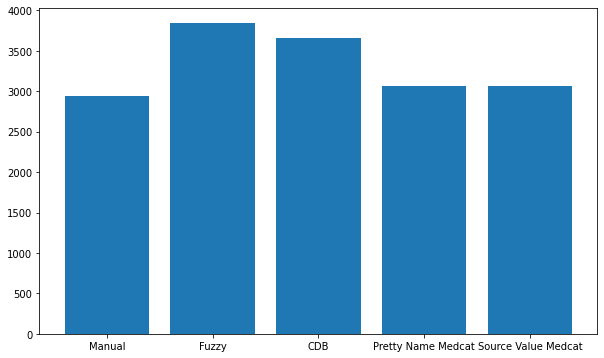

In [19]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Manual', 'Fuzzy', 'CDB', 'Pretty Name Medcat', 'Source Value Medcat'],
    height=[mapped_counts_manual, mapped_counts_fuzzy, mapped_counts_cdb, mapped_counts_pretty_name_medcat, mapped_counts_source_value_medcat],
    # title='Title',
    # xlab
    )

#### Token Sort Ratio

In [20]:
from fuzzywuzzy import fuzz

def calculateTokenSortRatio(conceptName, mappedConceptName):
    if mappedConceptName:
        mappedConceptName = str(mappedConceptName)
        if len(mappedConceptName) > 0:
            return fuzz.token_sort_ratio(conceptName, mappedConceptName)
    return 0

In [21]:
finalDf['Mapped Score Fuzzy'].sum()

248585

In [22]:
sum([calculateTokenSortRatio(row['concept_name'], row['Mapped Concept Fuzzy']) for _, row in finalDf.iterrows()])

248585

In [24]:
finalDf['Token Sort Ratio Manual'] = [calculateTokenSortRatio(row['concept_name'], row['concept_name_con']) for _, row in finalDf.iterrows()]
finalDf['Token Sort Ratio Fuzzy'] = [calculateTokenSortRatio(row['concept_name'], row['Mapped Concept Fuzzy']) for _, row in finalDf.iterrows()]
finalDf['Token Sort Ratio CDB'] = [calculateTokenSortRatio(row['concept_name'], row['Mapped Concept CDB']) for _, row in finalDf.iterrows()]
finalDf['Token Sort Ratio Pretty Name Medcat'] = [calculateTokenSortRatio(row['concept_name'], row['Mapped Concept Pretty Name Medcat']) for _, row in finalDf.iterrows()]
finalDf['Token Sort Ratio Source Value Medcat'] = [calculateTokenSortRatio(row['concept_name'], row['Mapped Concept Source Value Medcat']) for _, row in finalDf.iterrows()]

#### Total Token Sort Ratio

In [26]:
token_sort_ratio_manual = finalDf['Token Sort Ratio Manual'].sum()
token_sort_ratio_fuzzy = finalDf['Token Sort Ratio Fuzzy'].sum()
token_sort_ratio_cdb = finalDf['Token Sort Ratio CDB'].sum()
token_sort_ratio_pretty_name_medcat = finalDf['Token Sort Ratio Pretty Name Medcat'].sum()
token_sort_source_value_medcat = finalDf['Token Sort Ratio Source Value Medcat'].sum()

print('Token Sort Ratio Manual: ', token_sort_ratio_manual)
print('Token Sort Ratio Fuzzy: ', token_sort_ratio_fuzzy)
print('Token Sort Ratio CDB: ', token_sort_ratio_cdb)
print('Token Sort Ratio Pretty Name Medcat: ', token_sort_ratio_pretty_name_medcat)
print('Token Sort Ratio Source Value Medcat: ', token_sort_source_value_medcat)

Token Sort Ratio Manual:  236057
Token Sort Ratio Fuzzy:  248585
Token Sort Ratio CDB:  191395
Token Sort Ratio Pretty Name Medcat:  148637
Token Sort Ratio Source Value Medcat:  161526


<BarContainer object of 5 artists>

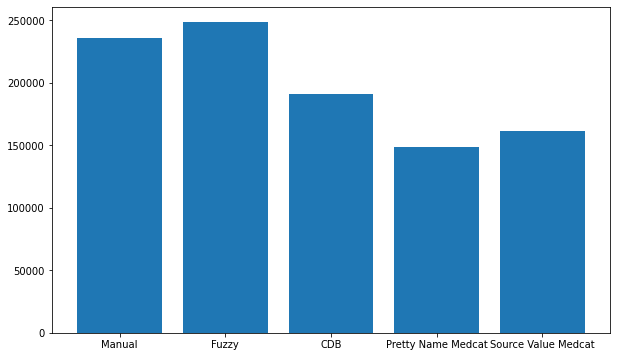

In [27]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Manual', 'Fuzzy', 'CDB', 'Pretty Name Medcat', 'Source Value Medcat'],
    height=[token_sort_ratio_manual, token_sort_ratio_fuzzy, token_sort_ratio_cdb, token_sort_ratio_pretty_name_medcat, token_sort_source_value_medcat],
    # title='Title',
    # xlab
    )

#### Average Token Sort Ratio

In [28]:
avg_token_sort_ratio_manual = finalDf[finalDf['concept_name_con'].notna()]['Token Sort Ratio Manual'].sum()/finalDf[finalDf['concept_name_con'].notna()].shape[0]
avg_token_sort_ratio_fuzzy = finalDf[finalDf['Mapped Concept Fuzzy'].notna()]['Token Sort Ratio Fuzzy'].sum()/finalDf[finalDf['Mapped Concept Fuzzy'].notna()].shape[0]
avg_token_sort_ratio_cdb = finalDf[finalDf['Mapped Concept CDB'].notna()]['Token Sort Ratio CDB'].sum()/finalDf[finalDf['Mapped Concept CDB'].notna()].shape[0]
avg_token_sort_ratio_pretty_name_medcat = finalDf[finalDf['Mapped Concept Pretty Name Medcat'].notna()]['Token Sort Ratio Pretty Name Medcat'].sum()/finalDf[finalDf['Mapped Concept Pretty Name Medcat'].notna()].shape[0]
avg_token_sort_source_value_medcat = finalDf[finalDf['Mapped Concept Source Value Medcat'].notna()]['Token Sort Ratio Source Value Medcat'].sum()/finalDf[finalDf['Mapped Concept Source Value Medcat'].notna()].shape[0]

print('Average Token Sort Ratio Manual: ', avg_token_sort_ratio_manual)
print('Average Token Sort Ratio Fuzzy: ', avg_token_sort_ratio_fuzzy)
print('Average Token Sort Ratio CDB: ', avg_token_sort_ratio_cdb)
print('Average Token Sort Ratio Pretty Name Medcat: ', avg_token_sort_ratio_pretty_name_medcat)
print('Average Token Sort Ratio Source Value Medcat: ', avg_token_sort_source_value_medcat)

Average Token Sort Ratio Manual:  77.51086218601493
Average Token Sort Ratio Fuzzy:  64.7019781363873
Average Token Sort Ratio CDB:  52.365253077975375
Average Token Sort Ratio Pretty Name Medcat:  48.431736722059306
Average Token Sort Ratio Source Value Medcat:  52.63147605083089


<BarContainer object of 5 artists>

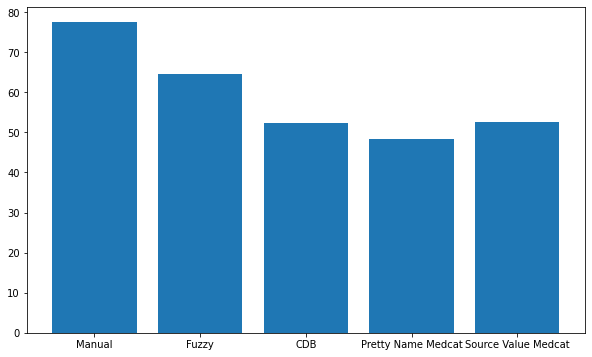

In [29]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Manual', 'Fuzzy', 'CDB', 'Pretty Name Medcat', 'Source Value Medcat'],
    height=[avg_token_sort_ratio_manual, avg_token_sort_ratio_fuzzy, avg_token_sort_ratio_cdb, avg_token_sort_ratio_pretty_name_medcat, avg_token_sort_source_value_medcat],
    # title='Title',
    # xlab
    )

#### Category Wise Token Sort Ratio

In [30]:
dfs = []

valueColumns = ['Token Sort Ratio Manual', 'Token Sort Ratio Fuzzy', 'Token Sort Ratio CDB', 'Token Sort Ratio Pretty Name Medcat', 'Token Sort Ratio Source Value Medcat']
conceptColumns = ['concept_name_con', 'Mapped Concept Fuzzy', 'Mapped Concept CDB', 'Mapped Concept Pretty Name Medcat', 'Mapped Concept Source Value Medcat']
for valueColumn, conceptColumn in zip(valueColumns, conceptColumns):
    dfs.append(
        finalDf[finalDf[conceptColumn].notna()]\
            .groupby('source_vocabulary_id')\
                .agg({'concept_name': 'count', valueColumn: 'mean'})\
                    .sort_values('source_vocabulary_id')\
                        .reset_index()\
                            .rename(columns={'concept_name': valueColumn + ' Count', valueColumn: valueColumn + ' Average'})
    )

In [31]:
tokenSortRatioDf = pd.concat([dfs[0]['source_vocabulary_id'], dfs[0]['Token Sort Ratio Manual Count'], *[df.iloc[:, 2] for df in dfs]], axis=1)
tokenSortRatioDf.rename(columns={'Token Sort Ratio Manual Count': 'Count'}, inplace=True)
tokenSortRatioDf

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio CDB Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,57.250000,67.600000,78.800000
1,mimiciv_drug_ndc,1400,97.872857,64.107143,58.854585,46.862069,50.188088
2,mimiciv_drug_route,96,32.833333,45.270833,50.347826,51.200000,85.857143
3,mimiciv_meas_chart,167,59.083832,63.911243,58.579710,58.339869,66.614379
4,mimiciv_meas_chartevents_value,29,73.689655,69.103448,55.583333,58.416667,47.583333
5,mimiciv_meas_lab_loinc,251,48.382470,63.330677,37.972112,40.685714,41.746939
6,mimiciv_meas_unit,54,41.222222,42.981481,38.476190,51.750000,71.166667
7,mimiciv_meas_wf,44,82.340909,57.250000,45.950000,33.897436,56.923077
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,74.000000,89.520000,97.200000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,96.896552,61.294118,69.441176


##### Category Wise Token Sort Ratio For Medcat

In [32]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Source Value Medcat Average']>70]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio CDB Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,57.250000,67.600000,78.800000
2,mimiciv_drug_route,96,32.833333,45.270833,50.347826,51.200000,85.857143
6,mimiciv_meas_unit,54,41.222222,42.981481,38.476190,51.750000,71.166667
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,74.000000,89.520000,97.200000
11,mimiciv_micro_organism,364,82.945055,75.013736,64.407303,80.000000,100.000000
12,mimiciv_micro_resistance,4,100.000000,64.500000,100.000000,62.189189,70.202703
15,mimiciv_obs_drgcodes,22,93.954545,66.455240,37.806704,60.800000,100.000000
16,mimiciv_obs_insurance,5,53.800000,55.800000,100.000000,61.000000,100.000000
17,mimiciv_obs_language,1,61.000000,52.000000,83.714286,54.200000,87.600000
18,mimiciv_obs_marital,7,77.857143,62.857143,69.428571,69.000000,78.000000


In [33]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Source Value Medcat Average']>tokenSortRatioDf['Token Sort Ratio Manual Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio CDB Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,57.250000,67.600000,78.800000
2,mimiciv_drug_route,96,32.833333,45.270833,50.347826,51.200000,85.857143
3,mimiciv_meas_chart,167,59.083832,63.911243,58.579710,58.339869,66.614379
6,mimiciv_meas_unit,54,41.222222,42.981481,38.476190,51.750000,71.166667
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,74.000000,89.520000,97.200000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,96.896552,61.294118,69.441176
10,mimiciv_micro_microtest,34,65.676471,65.411765,54.617647,64.403636,68.156364
11,mimiciv_micro_organism,364,82.945055,75.013736,64.407303,80.000000,100.000000
13,mimiciv_micro_specimen,85,57.588235,61.494118,59.148148,56.800000,64.000000
14,mimiciv_mimic_generated,12,29.250000,65.416667,57.888889,40.780460,42.386207


In [39]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Source Value Medcat Average']>tokenSortRatioDf['Token Sort Ratio Fuzzy Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio CDB Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,57.250000,67.600000,78.800000
2,mimiciv_drug_route,96,32.833333,45.270833,50.347826,51.200000,85.857143
3,mimiciv_meas_chart,167,59.083832,63.911243,58.579710,58.339869,66.614379
6,mimiciv_meas_unit,54,41.222222,42.981481,38.476190,51.750000,71.166667
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,74.000000,89.520000,97.200000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,96.896552,61.294118,69.441176
10,mimiciv_micro_microtest,34,65.676471,65.411765,54.617647,64.403636,68.156364
11,mimiciv_micro_organism,364,82.945055,75.013736,64.407303,80.000000,100.000000
12,mimiciv_micro_resistance,4,100.000000,64.500000,100.000000,62.189189,70.202703
13,mimiciv_micro_specimen,85,57.588235,61.494118,59.148148,56.800000,64.000000


##### Category Wise Token Sort Ratio For Fuzzy

In [34]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Fuzzy Average']>70]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio CDB Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
11,mimiciv_micro_organism,364,82.945055,75.013736,64.407303,80.0,100.0


In [36]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Fuzzy Average']>tokenSortRatioDf['Token Sort Ratio Manual Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio CDB Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,57.250000,67.600000,78.800000
2,mimiciv_drug_route,96,32.833333,45.270833,50.347826,51.200000,85.857143
3,mimiciv_meas_chart,167,59.083832,63.911243,58.579710,58.339869,66.614379
5,mimiciv_meas_lab_loinc,251,48.382470,63.330677,37.972112,40.685714,41.746939
6,mimiciv_meas_unit,54,41.222222,42.981481,38.476190,51.750000,71.166667
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,96.896552,61.294118,69.441176
13,mimiciv_micro_specimen,85,57.588235,61.494118,59.148148,56.800000,64.000000
14,mimiciv_mimic_generated,12,29.250000,65.416667,57.888889,40.780460,42.386207
16,mimiciv_obs_insurance,5,53.800000,55.800000,100.000000,61.000000,100.000000
20,mimiciv_proc_datetimeevents,129,38.217054,63.992248,60.989796,57.031250,71.406250


##### Category Wise Token Sort Ratio For CDB

In [37]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio CDB Average']>70]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio CDB Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,74.000000,89.520000,97.200000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,96.896552,61.294118,69.441176
12,mimiciv_micro_resistance,4,100.000000,64.500000,100.000000,62.189189,70.202703
16,mimiciv_obs_insurance,5,53.800000,55.800000,100.000000,61.000000,100.000000
17,mimiciv_obs_language,1,61.000000,52.000000,83.714286,54.200000,87.600000


In [38]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio CDB Average']>tokenSortRatioDf['Token Sort Ratio Manual Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio CDB Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,57.250000,67.600000,78.800000
2,mimiciv_drug_route,96,32.833333,45.270833,50.347826,51.200000,85.857143
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,96.896552,61.294118,69.441176
13,mimiciv_micro_specimen,85,57.588235,61.494118,59.148148,56.800000,64.000000
14,mimiciv_mimic_generated,12,29.250000,65.416667,57.888889,40.780460,42.386207
16,mimiciv_obs_insurance,5,53.800000,55.800000,100.000000,61.000000,100.000000
17,mimiciv_obs_language,1,61.000000,52.000000,83.714286,54.200000,87.600000
20,mimiciv_proc_datetimeevents,129,38.217054,63.992248,60.989796,57.031250,71.406250
21,mimiciv_proc_itemid,113,51.115044,63.327434,61.578947,54.289474,67.078947
22,mimiciv_vis_admission_location,43,58.279070,64.860465,67.833333,65.500000,78.250000


### Using `Semantic Similarity` (based on `Phrase Embeddings`)

In [40]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('pritamdeka/S-BioBert-snli-multinli-stsb')

def calculateSemanticSimilarity(conceptName, mappedConceptName):
    if mappedConceptName:
        mappedConceptName = str(mappedConceptName)
        if len(mappedConceptName) > 0:
            conceptNameEmbedding = model.encode(conceptName, convert_to_tensor=True)
            mappedConceptNameEmbedding = model.encode(mappedConceptName, convert_to_tensor=True)
            similarityScore = util.pytorch_cos_sim(conceptNameEmbedding, mappedConceptNameEmbedding)
            return similarityScore
    return 0


/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [41]:
finalDf['Semantic Similarity Manual'] = [calculateSemanticSimilarity(row['concept_name'], row['concept_name_con']) for _, row in finalDf.iterrows()]
finalDf['Semantic Similarity Fuzzy'] = [calculateSemanticSimilarity(row['concept_name'], row['Mapped Concept Fuzzy']) for _, row in finalDf.iterrows()]
finalDf['Semantic Similarity CDB'] = [calculateSemanticSimilarity(row['concept_name'], row['Mapped Concept CDB']) for _, row in finalDf.iterrows()]
finalDf['Semantic Similarity Pretty Name Medcat'] = [calculateSemanticSimilarity(row['concept_name'], row['Mapped Concept Pretty Name Medcat']) for _, row in finalDf.iterrows()]
finalDf['Semantic Similarity Source Value Medcat'] = [calculateSemanticSimilarity(row['concept_name'], row['Mapped Concept Source Value Medcat']) for _, row in finalDf.iterrows()]

#### Total Semantic Similarity

In [ ]:
semantic_similarity_manual = finalDf['Semantic Similarity Manual'].sum()[0][0].item()
semantic_similarity_fuzzy = finalDf['Semantic Similarity Fuzzy'].sum()[0][0].item()
semantic_similarity_cdb = finalDf['Semantic Similarity CDB'].sum()[0][0].item()
semantic_similarity_pretty_name_medcat = finalDf['Semantic Similarity Pretty Name Medcat'].sum()[0][0].item()
semantic_similarity_source_value_medcat = finalDf['Semantic Similarity Source Value Medcat'].sum()[0][0].item()

print('Semantic Similarity Manual: ', semantic_similarity_manual)
print('Semantic Similarity Fuzzy: ', semantic_similarity_fuzzy)
print('Semantic Similarity CDB: ', semantic_similarity_cdb)
print('Semantic Similarity Pretty Name Medcat: ', semantic_similarity_pretty_name_medcat)
print('Semantic Similarity Source Value Medcat: ', semantic_similarity_source_value_medcat)

Semantic Similarity Manual:  2129.58056640625
Semantic Similarity Fuzzy:  1697.3245849609375
Semantic Similarity CDB:  1534.2099609375
Semantic Similarity Pretty Name Medcat:  1222.698974609375
Semantic Similarity Source Value Medcat:  1843.0672607421875


<BarContainer object of 5 artists>

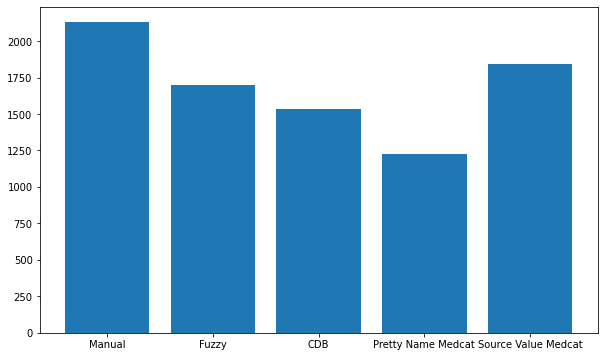

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Manual', 'Fuzzy', 'CDB', 'Pretty Name Medcat', 'Source Value Medcat'],
    height=[semantic_similarity_manual, semantic_similarity_fuzzy, semantic_similarity_cdb, semantic_similarity_pretty_name_medcat, semantic_similarity_source_value_medcat],
    )

#### Average Semantic Similarity

In [ ]:
avg_semantic_similarity_manual = finalDf[finalDf['concept_name_con'].notna()]['Semantic Similarity Manual'].sum()[0][0].item()/finalDf[finalDf['concept_name_con'].notna()].shape[0]
avg_semantic_similarity_fuzzy = finalDf[finalDf['Mapped Concept Fuzzy'].notna()]['Semantic Similarity Fuzzy'].sum()[0][0].item()/finalDf[finalDf['Mapped Concept Fuzzy'].notna()].shape[0]
avg_semantic_similarity_cdb = finalDf[finalDf['Mapped Concept CDB'].notna()]['Semantic Similarity CDB'].sum()[0][0].item()/finalDf[finalDf['Mapped Concept CDB'].notna()].shape[0]
avg_semantic_similarity_pretty_name_medcat = finalDf[finalDf['Mapped Concept Pretty Name Medcat'].notna()]['Semantic Similarity Pretty Name Medcat'].sum()[0][0].item()/finalDf[finalDf['Mapped Concept Pretty Name Medcat'].notna()].shape[0]
avg_semantic_similarity_source_value_medcat = finalDf[finalDf['Mapped Concept Source Value Medcat'].notna()]['Semantic Similarity Source Value Medcat'].sum()[0][0].item()/finalDf[finalDf['Mapped Concept Source Value Medcat'].notna()].shape[0]

print('Average Semantic Similarity Manual: ', avg_semantic_similarity_manual)
print('Average Semantic Similarity Fuzzy: ', avg_semantic_similarity_fuzzy)
print('Average Semantic Similarity CDB: ', avg_semantic_similarity_cdb)
print('Average Semantic Similarity Pretty Name Medcat: ', avg_semantic_similarity_pretty_name_medcat)
print('Average Semantic Similarity Source Value Medcat: ', avg_semantic_similarity_source_value_medcat)

Average Semantic Similarity Manual:  0.7091162241970044
Average Semantic Similarity Fuzzy:  0.4417815161272612
Average Semantic Similarity CDB:  0.41975648726060194
Average Semantic Similarity Pretty Name Medcat:  0.3984030546136771
Average Semantic Similarity Source Value Medcat:  0.6005432586321888


<BarContainer object of 5 artists>

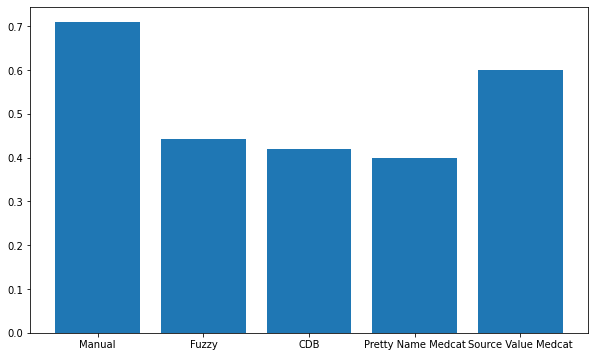

In [ ]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Manual', 'Fuzzy', 'CDB', 'Pretty Name Medcat', 'Source Value Medcat'],
    height=[avg_semantic_similarity_manual, avg_semantic_similarity_fuzzy, avg_semantic_similarity_cdb, avg_semantic_similarity_pretty_name_medcat, avg_semantic_similarity_source_value_medcat],
    )

#### Category Wise Semantic Similarity

In [ ]:
dfs_1 = []

valueColumns = ['Semantic Similarity Manual', 'Semantic Similarity Fuzzy', 'Semantic Similarity CDB', 'Semantic Similarity Pretty Name Medcat', 'Semantic Similarity Source Value Medcat']
conceptColumns = ['concept_name_con', 'Mapped Concept Fuzzy', 'Mapped Concept CDB', 'Mapped Concept Pretty Name Medcat', 'Mapped Concept Source Value Medcat']
for valueColumn, conceptColumn in zip(valueColumns, conceptColumns):
    dfs_1.append(
        finalDf[finalDf[conceptColumn].notna()]\
            .groupby('source_vocabulary_id')\
                .agg({'concept_name': 'count', valueColumn: 'mean'})\
                    .sort_values('source_vocabulary_id')\
                        .reset_index()\
                            .rename(columns={'concept_name': valueColumn + ' Count', valueColumn: valueColumn + ' Average'})
    )

In [ ]:
semanticSimilarityDf = pd.concat([dfs_1[0]['source_vocabulary_id'], dfs_1[0]['Semantic Similarity Manual Count'], *[df.iloc[:, 2] for df in dfs_1]], axis=1)
semanticSimilarityDf.rename(columns={'Semantic Similarity Manual Count': 'Count'}, inplace=True)
semanticSimilarityDf

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity CDB Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.664553,0.740584,0.845858
1,mimiciv_drug_ndc,1400,0.939480,0.618476,0.545745,0.475402,0.549793
2,mimiciv_drug_route,96,0.334011,0.241432,0.403055,0.342945,0.839308
3,mimiciv_meas_chart,167,0.670031,0.439099,0.512369,0.576956,0.695018
4,mimiciv_meas_chartevents_value,29,0.721108,0.656029,0.533281,0.599623,0.584879
5,mimiciv_meas_lab_loinc,251,0.617718,0.489650,0.458387,0.543863,0.570102
6,mimiciv_meas_unit,54,0.547541,0.260350,0.454752,0.533699,0.798629
7,mimiciv_meas_wf,44,0.888265,0.305915,0.339932,0.352940,0.515828
8,mimiciv_meas_wf_unit,3,0.885513,0.313381,0.766538,0.407654,0.972029
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.392676,0.385626,0.791045


##### Category Wise Token Sort Ratio For Medcat

In [ ]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Source Value Medcat Average']>0.8]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity CDB Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.664553,0.740584,0.845858
2,mimiciv_drug_route,96,0.334011,0.241432,0.403055,0.342945,0.839308
8,mimiciv_meas_wf_unit,3,0.885513,0.313381,0.766538,0.407654,0.972029
11,mimiciv_micro_organism,364,0.415814,0.399316,0.379859,0.844764,1.000000
15,mimiciv_obs_drgcodes,22,0.931749,0.239697,0.201822,0.675072,1.000000
16,mimiciv_obs_insurance,5,0.679697,0.233933,0.218943,0.267967,1.000000
17,mimiciv_obs_language,1,0.252213,0.247790,0.256598,0.172623,0.920541
18,mimiciv_obs_marital,7,0.213379,0.262700,0.279642,0.278318,0.851981


In [ ]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Source Value Medcat Average']>semanticSimilarityDf['Semantic Similarity Manual Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity CDB Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.664553,0.740584,0.845858
2,mimiciv_drug_route,96,0.334011,0.241432,0.403055,0.342945,0.839308
3,mimiciv_meas_chart,167,0.670031,0.439099,0.512369,0.576956,0.695018
6,mimiciv_meas_unit,54,0.547541,0.260350,0.454752,0.533699,0.798629
8,mimiciv_meas_wf_unit,3,0.885513,0.313381,0.766538,0.407654,0.972029
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.392676,0.385626,0.791045
10,mimiciv_micro_microtest,34,0.410432,0.335759,0.267317,0.312025,0.726716
11,mimiciv_micro_organism,364,0.415814,0.399316,0.379859,0.844764,1.000000
13,mimiciv_micro_specimen,85,0.348448,0.316497,0.346580,0.584245,0.680382
14,mimiciv_mimic_generated,12,0.074238,0.366378,0.516876,0.231551,0.539345


In [ ]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Source Value Medcat Average']>semanticSimilarityDf['Semantic Similarity Fuzzy Average']]

##### Category Wise Token Sort Ratio For Fuzzy

In [ ]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Fuzzy Average']>0.5]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity CDB Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
1,mimiciv_drug_ndc,1400,0.939480,0.618476,0.545745,0.475402,0.549793
4,mimiciv_meas_chartevents_value,29,0.721108,0.656029,0.533281,0.599623,0.584879


In [ ]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Fuzzy Average']>semanticSimilarityDf['Semantic Similarity Manual Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity CDB Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.392676,0.385626,0.791045
14,mimiciv_mimic_generated,12,0.074238,0.366378,0.516876,0.231551,0.539345
18,mimiciv_obs_marital,7,0.213379,0.262700,0.279642,0.278318,0.851981
20,mimiciv_proc_datetimeevents,129,0.301727,0.355146,0.598362,0.597174,0.761581
24,mimiciv_vis_discharge_location,13,0.246134,0.264549,0.284028,0.505985,0.619675


##### Category Wise Token Sort Ratio For CDB

In [ ]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity CDB Average']>0.7]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity CDB Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
8,mimiciv_meas_wf_unit,3,0.885513,0.313381,0.766538,0.407654,0.972029
12,mimiciv_micro_resistance,4,1.000000,0.374386,1.000000,0.373432,0.795389


In [ ]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity CDB Average']>semanticSimilarityDf['Semantic Similarity Manual Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity CDB Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.664553,0.740584,0.845858
2,mimiciv_drug_route,96,0.334011,0.241432,0.403055,0.342945,0.839308
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.392676,0.385626,0.791045
14,mimiciv_mimic_generated,12,0.074238,0.366378,0.516876,0.231551,0.539345
17,mimiciv_obs_language,1,0.252213,0.247790,0.256598,0.172623,0.920541
18,mimiciv_obs_marital,7,0.213379,0.262700,0.279642,0.278318,0.851981
19,mimiciv_per_ethnicity,8,0.270955,0.252993,0.445965,0.415420,0.506267
20,mimiciv_proc_datetimeevents,129,0.301727,0.355146,0.598362,0.597174,0.761581
24,mimiciv_vis_discharge_location,13,0.246134,0.264549,0.284028,0.505985,0.619675
